In [1]:
from datascience import *
#path_data = '../../../assets/data/'
path_data = '/content/gdrive/MyDrive/DataScience/data/'
import matplotlib
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# 경험적 분포

데이터 과학에서 "경험적(empirical)"이라는 단어는 "관찰된"을 의미합니다. 경험적 분포는 무작위 표본의 데이터와 같이 관찰된 데이터의 분포입니다.

이 절에서는 데이터를 생성하고 경험적 분포가 어떻게 생겼는지 살펴보겠습니다.

우리의 설정은 간단한 실험입니다: 주사위를 여러 번 굴리고 어느 면이 나타나는지 추적합니다. 테이블 `die`는 주사위 면의 점 수를 포함합니다. 주사위가 공정하다고 가정하므로 모든 숫자가 정확히 한 번씩 나타납니다.

In [3]:
np.arange(1, 7, 1)

array([1, 2, 3, 4, 5, 6])

In [4]:
die = Table().with_column('Face', np.arange(1, 7, 1))
die

Face
1
2
3
4
5
6


## 확률 분포

아래 히스토그램은 모든 면이 확률 1/6로 나타난다는 사실을 시각화하는 데 도움이 됩니다. 히스토그램이 모든 가능한 면에 대한 확률의 *분포*를 보여준다고 말합니다. 모든 막대가 동일한 백분율 확률을 나타내므로 이 분포를 *1부터 6까지의 정수에 대한 균등 분포*라고 합니다.

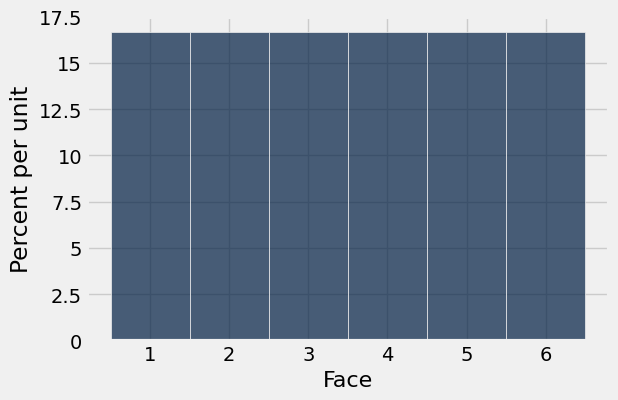

In [6]:
die_bins = np.arange(0.5, 6.6, 1)
die.hist(bins = die_bins)

주사위 값처럼 연속된 값들이 동일한 고정 간격으로 분리되어 있는 변수들(연속된 값이 1로 분리됨)은 *이산* 변수라고 불리는 변수 클래스에 속합니다. 위의 히스토그램을 *이산* 히스토그램이라고 합니다. 이 히스토그램의 구간은 배열 `die_bins`로 지정되며 각 막대가 해당 정수 값 위에 중앙에 위치하도록 합니다.

주사위는 1.3개의 점이나 5.2개의 점을 보여줄 수 없으며 항상 정수 개의 점을 보여준다는 것을 기억하는 것이 중요합니다. 그러나 우리의 시각화는 각 값의 확률을 막대 영역에 걸쳐 분산시킵니다. 이것이 과정의 현 단계에서는 다소 임의적으로 보일 수 있지만, 나중에 이산 히스토그램 위에 부드러운 곡선을 겹쳐 놓을 때 중요해질 것입니다.

더 나아가기 전에 축의 숫자들이 의미가 있는지 확인해봅시다. 각 면의 확률은 1/6이며, 이는 소수점 둘째 자리로 반올림하면 16.67%입니다. 각 구간의 너비는 1 단위입니다. 따라서 각 막대의 높이는 단위당 16.67%입니다. 이것은 그래프의 가로 및 세로 눈금과 일치합니다.

## 경험적 분포
위의 분포는 각 면의 이론적 확률로 구성됩니다. 이것은 *확률 분포*라고 하며 관찰된 데이터를 기반으로 하지 않습니다. 주사위를 굴리지 않고도 연구하고 이해할 수 있습니다.

반면에 *경험적 분포*는 관찰된 데이터의 분포입니다. *경험적 히스토그램*으로 시각화할 수 있습니다.

주사위 굴림을 시뮬레이션하여 데이터를 얻어봅시다. 이것은 1부터 6까지의 정수에서 복원추출로 무작위로 표본추출함으로써 수행할 수 있습니다. 이전에 이러한 시뮬레이션을 위해 `np.random.choice`를 사용했습니다. 하지만 이제 이를 수행하는 테이블 메서드를 소개하겠습니다. 이렇게 하면 시각화를 위해 익숙한 테이블 메서드를 더 쉽게 사용할 수 있습니다.

테이블 메서드는 `sample`이라고 합니다. 테이블의 행에서 복원추출로 무작위로 추출합니다. 인수는 표본 크기이며 선택된 행으로 구성된 테이블을 반환합니다. 선택적 인수 `with_replacement=False`는 표본을 비복원추출로 추출하도록 지정합니다. 하지만 주사위 굴리기에는 적용되지 않습니다.

다음은 주사위를 10번 굴린 결과입니다.

In [7]:
die.sample(10)

Face
2
3
1
5
4
6
3
6
3
2


동일한 메서드를 사용하여 원하는 만큼 많은 굴림을 시뮬레이션한 다음 결과의 경험적 히스토그램을 그릴 수 있습니다. 이것을 반복적으로 수행할 것이므로 표본 크기를 인수로 받아 주사위를 인수만큼 굴린 다음 관찰된 결과의 히스토그램을 그리는 함수 `empirical_hist_die`를 정의합니다.

In [8]:
def empirical_hist_die(n):
    die.sample(n).hist(bins = die_bins)

## 경험적 히스토그램

다음은 10번 굴림의 경험적 히스토그램입니다. 위의 확률 히스토그램과 크게 다르지 않습니다. 셀을 몇 번 실행하여 어떻게 달라지는지 확인해보세요.

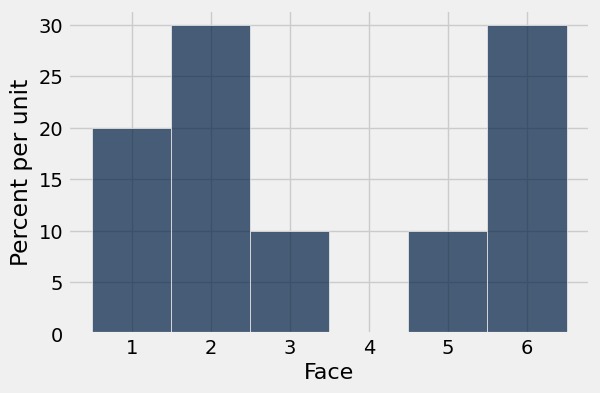

In [20]:
empirical_hist_die(10)

표본 크기가 증가하면 경험적 히스토그램은 이론적 확률의 히스토그램처럼 보이기 시작합니다.

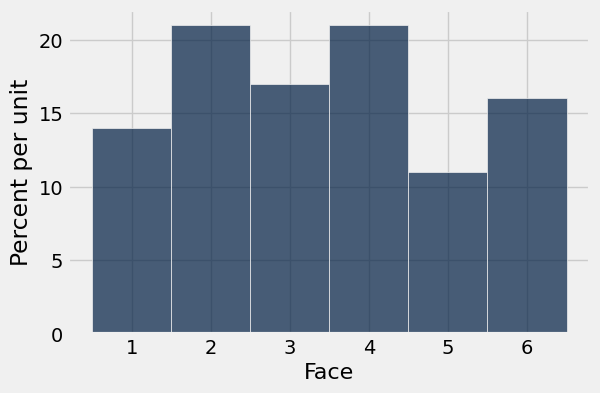

In [25]:
empirical_hist_die(100)

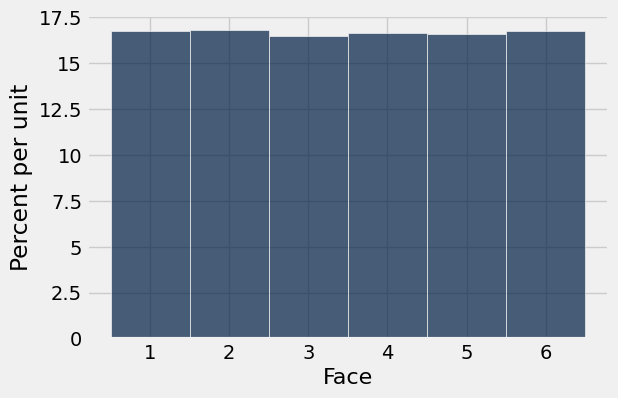

In [29]:
empirical_hist_die(100000)

시뮬레이션에서 굴림 횟수를 증가시키면 각 막대의 면적이 16.67%에 가까워지며, 이는 확률 히스토그램에서 각 막대의 면적입니다.

## 대수의 법칙

우리가 위에서 관찰한 것은 *대수의 법칙*이라고 불리는 일반 규칙의 사례입니다:

우연 실험이 독립적으로 그리고 동일한 조건 하에서 반복되면, 장기적으로 사건이 발생하는 비율은 사건의 이론적 확률에 점점 더 가까워집니다.

예를 들어, 장기적으로 네 개의 점이 있는 면이 나타나는 비율은 1/6에 점점 더 가까워집니다.

여기서 "독립적으로 그리고 동일한 조건 하에서"는 모든 반복이 다른 모든 반복의 결과에 관계없이 동일한 방식으로 수행된다는 것을 의미합니다.

이러한 조건 하에서 위의 법칙은 우연 실험이 많은 횟수로 반복되면 사건이 발생하는 비율이 사건의 이론적 확률에 매우 가까울 가능성이 높다는 것을 의미합니다.